<a href="https://colab.research.google.com/github/vbolise/INSE6220_TermProject_Classification-using-Python/blob/main/Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classification with PyCaret

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

### Install Pycaret

In [ ]:
# Install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

## Import Libraries

In [ ]:
import numpy as np

# Open source data analysis and manipulation library for Python
import pandas as pd

# matplotlib - The Python library is needed to plot nice charts
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7,5)

# 'seaborn' - a matplotlib based statistical graphical library
import seaborn as sns; 
sns.set() # Use seaborn plotting style defaults
sns.set_theme(style="darkgrid")


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


## Dataset

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [ ]:
# Read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/vbolise/Project/main/cost-of-living.csv')
df.head(25)

Unnamed: 0     x1      x2     x3    x4     x5    x6    x7    x8  class
0            0   4.90   22.04   4.28  1.84   3.67  1.78  0.48  0.19      1
1            1   5.59   40.51   5.59  1.12   4.19  3.96  0.52  0.32      1
2            2   2.54   22.25   3.50  2.02   3.18  2.19  0.59  0.27      1
3            3   3.54   27.40   3.54  1.24   1.90  2.91  0.93  0.51      1
4            4   7.16   52.77   6.03  3.02   4.52  3.86  1.46  0.78      1
5            5   2.60   28.09   5.62  2.25   4.21  2.06  0.50  0.26      1
6            6   2.00   14.69   3.67  2.20   3.67  1.60  0.36  0.15      1
7            7   4.05   27.94   4.89  0.84   1.68  3.41  0.44  0.32      1
8            8   3.67   18.36   3.67  2.45   4.28  2.49  0.46  0.19      1
9            9   4.19   30.73   5.59  1.40   4.05  4.55  0.51  0.43      1
10          10   7.22   43.31   5.47  3.25   3.61  3.19  1.17  0.78      1
11          11   3.38   45.06   6.76  1.13   1.80  3.40  0.39  0.26      1
12          12   2.23   11.14   3.56  2.12   2.67  1.39  0.29  0.18      1
13          13   1.87   11.24   4.68  5.62   4.92  1.89  0.27  0.15      1
14          14   7.45   37.27   6.52  2.24   3.35  1.51  1.08  0.75      1
15          15   7.22   43.31   5.05  4.30   5.05  3.42  1.21  0.82      1
16          16  13.10   65.50   6.55  4.09   4.09  3.42  1.30  0.74      1
17          17   4.19   27.94   4.89  1.12   3.91  4.14  0.47  0.33      1
18          18   7.78   39.95   6.75  2.59   4.10  2.75  1.03  0.75      1
19          19   4.07   20.36   4.07  1.63   2.55  1.76  0.26  0.15      1
20          20  25.00  100.00  10.00  8.00  10.00  5.38  2.72  2.32      1
21          21   5.36   24.14   4.29  2.68   3.22  1.84  0.88  0.31      1
22          22   6.40   25.00   5.00  1.79   2.40  1.75  1.00  0.81      1
23          23   3.06   18.36   4.28  2.11   3.67  2.01  0.46  0.18      1
24          24   4.00   29.19   4.96  0.88   1.94  1.49  0.88  0.76      1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1048 non-null   int64  
 1   x1          1048 non-null   float64
 2   x2          1048 non-null   float64
 3   x3          1048 non-null   float64
 4   x4          1048 non-null   float64
 5   x5          1048 non-null   float64
 6   x6          1048 non-null   float64
 7   x7          1048 non-null   float64
 8   x8          1048 non-null   float64
 9   class       1048 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 82.0 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


## Exploratory Data Analysis

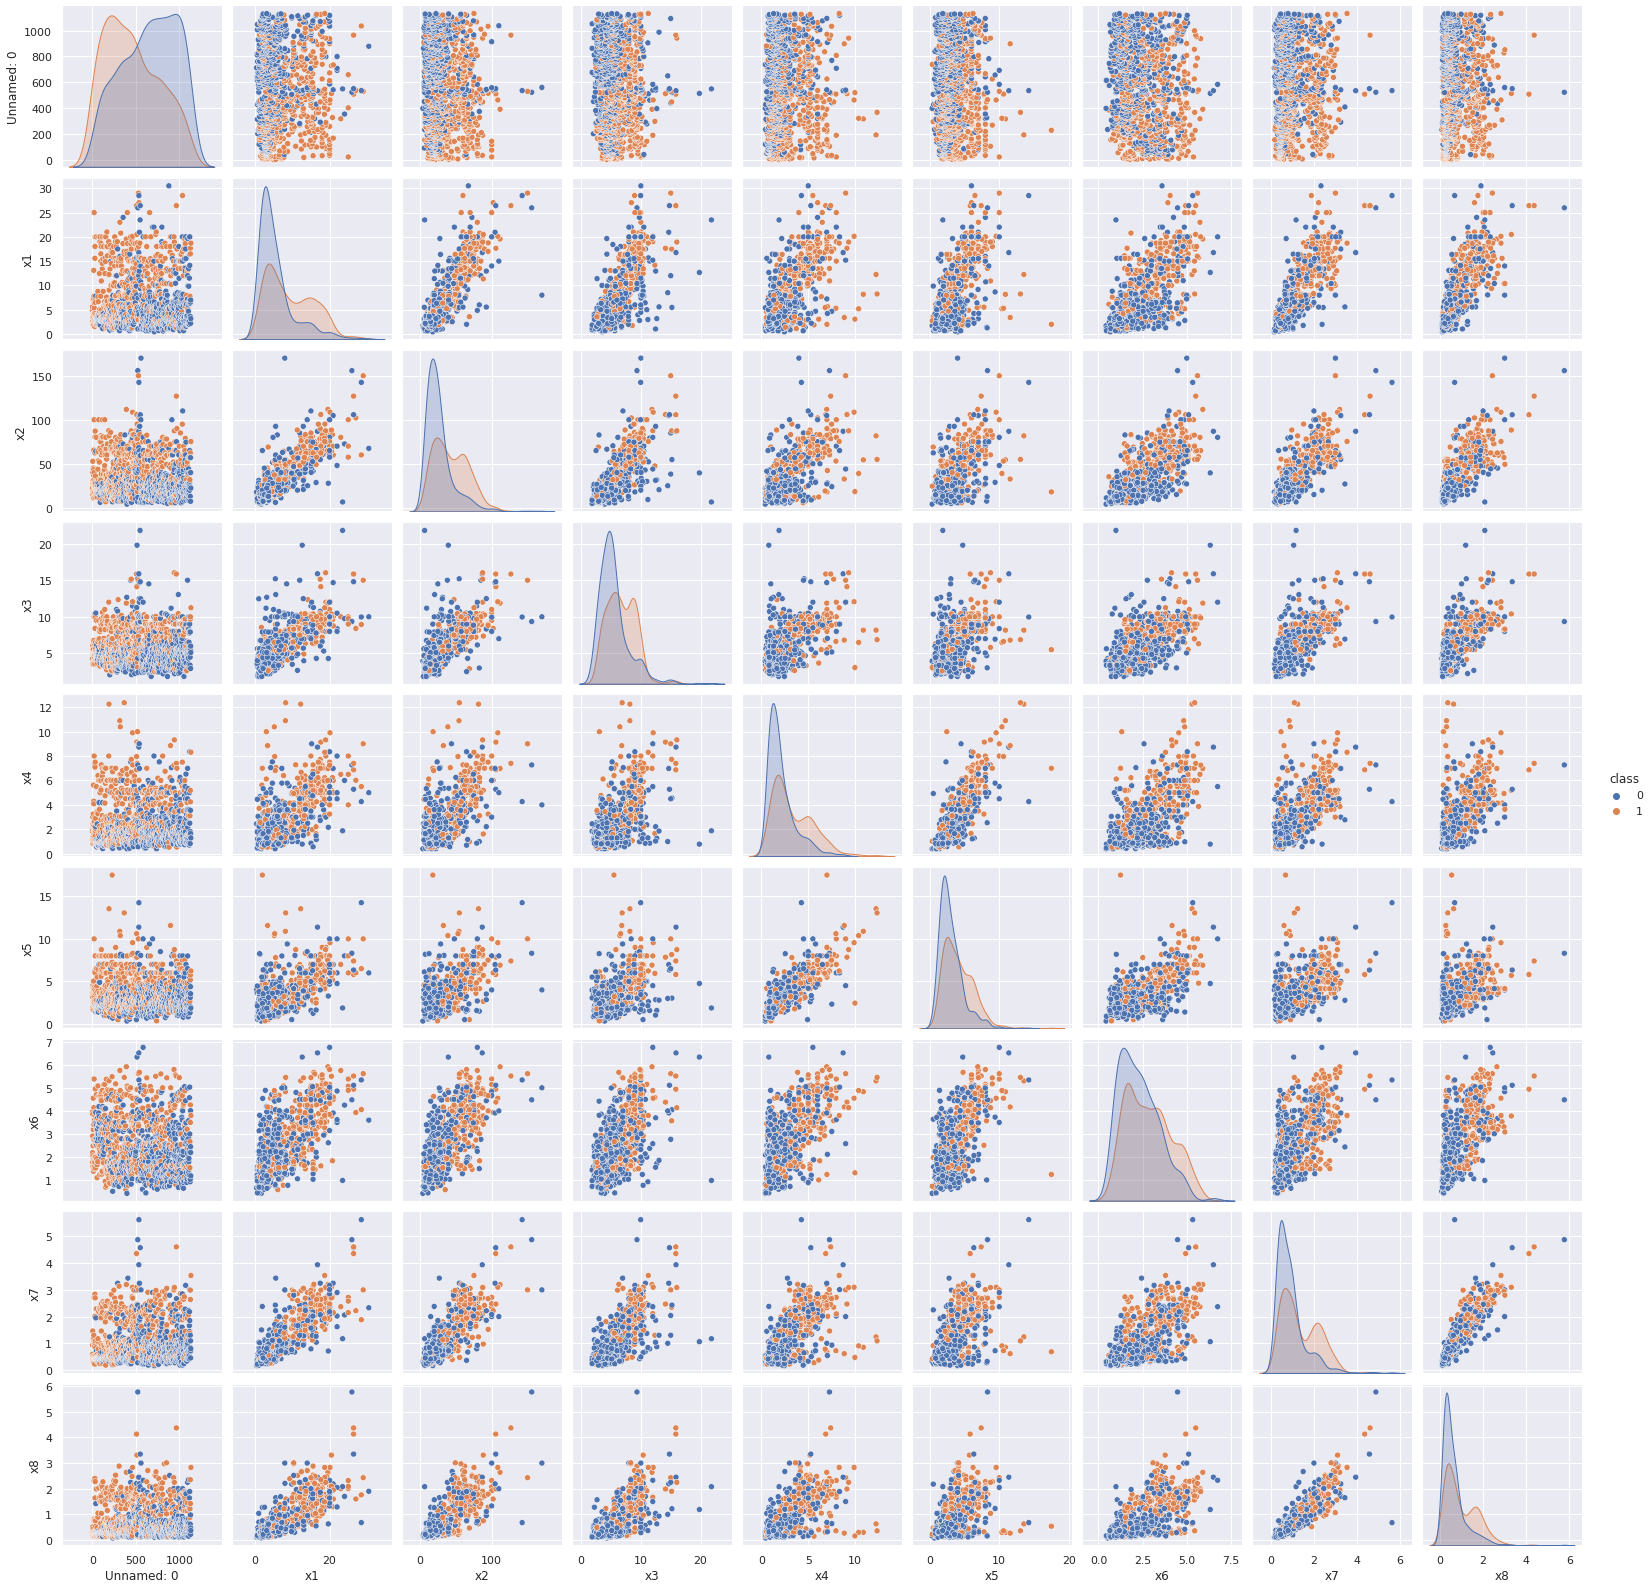

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

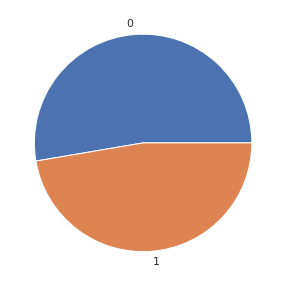

In [ ]:
y = df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

### Data Matrix

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

Unnamed: 0    x1     x2    x3    x4    x5    x6    x7    x8
0           0  4.90  22.04  4.28  1.84  3.67  1.78  0.48  0.19
1           1  5.59  40.51  5.59  1.12  4.19  3.96  0.52  0.32
2           2  2.54  22.25  3.50  2.02  3.18  2.19  0.59  0.27
3           3  3.54  27.40  3.54  1.24  1.90  2.91  0.93  0.51
4           4  7.16  52.77  6.03  3.02  4.52  3.86  1.46  0.78
5           5  2.60  28.09  5.62  2.25  4.21  2.06  0.50  0.26
6           6  2.00  14.69  3.67  2.20  3.67  1.60  0.36  0.15
7           7  4.05  27.94  4.89  0.84  1.68  3.41  0.44  0.32
8           8  3.67  18.36  3.67  2.45  4.28  2.49  0.46  0.19
9           9  4.19  30.73  5.59  1.40  4.05  4.55  0.51  0.43

In [ ]:
X.describe().transpose()

count        mean         std   min     25%      50%       75%  \
Unnamed: 0  1048.0  559.625000  325.138962  0.00  280.75  555.500  835.2500   
x1          1048.0    7.381450    5.886304  0.45    2.79    5.300   11.0250   
x2          1048.0   34.835926   23.748985  4.11   17.46   27.860   49.7625   
x3          1048.0    6.049351    2.559217  1.84    4.19    5.550    7.8400   
x4          1048.0    2.696412    1.930570  0.41    1.29    2.000    3.6400   
x5          1048.0    3.550124    2.041915  0.34    2.05    3.005    4.5200   
x6          1048.0    2.566279    1.227747  0.43    1.56    2.435    3.4025   
x7          1048.0    1.117529    0.795124  0.16    0.49    0.880    1.5700   
x8          1048.0    0.788273    0.671227  0.08    0.29    0.550    1.1250   

                max  
Unnamed: 0  1133.00  
x1            30.50  
x2           170.00  
x3            21.81  
x4            12.36  
x5            17.50  
x6             6.75  
x7             5.63  
x8             5.77

### Standardize the Data

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns

X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Unnamed: 0        x1        x2        x3        x4        x5        x6  \
0   -1.722009 -0.421765 -0.539056 -0.691694 -0.443818  0.058736 -0.640730   
1   -1.718932 -0.304487  0.239033 -0.179575 -0.816943  0.313520  1.135728   
2   -1.715855 -0.822887 -0.530209 -0.996621 -0.350536 -0.181350 -0.306625   
3   -1.712778 -0.652920 -0.313254 -0.980983 -0.754755 -0.808512  0.280095   
4   -1.709701 -0.037639  0.755512 -0.007565  0.167693  0.475210  1.054239   
5   -1.706624 -0.812689 -0.284187 -0.167847 -0.231344  0.323320 -0.412561   
6   -1.703546 -0.914669 -0.848691 -0.930162 -0.257255  0.058736 -0.787410   
7   -1.700469 -0.566237 -0.290506 -0.453226 -0.962047 -0.916305  0.687539   
8   -1.697392 -0.630824 -0.694084 -0.930162 -0.127698  0.357618 -0.062159   
9   -1.694315 -0.542441 -0.172971 -0.179575 -0.671838  0.244924  1.616512   

         x7        x8  
0 -0.802181 -0.891738  
1 -0.751850 -0.697970  
2 -0.663772 -0.772496  
3 -0.235961 -0.414771  
4  0.430920 -0.012331  
5 -0.777016 -0.787401  
6 -0.953173 -0.951358  
7 -0.852512 -0.697970  
8 -0.827346 -0.891738  
9 -0.764433 -0.534013

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Unnamed: 0  1048.0 -5.423990e-17  1.000477 -1.722009 -0.858120 -0.012693   
x1          1048.0  1.118698e-16  1.000477 -1.178118 -0.780395 -0.353778   
x2          1048.0 -1.491597e-16  1.000477 -1.294396 -0.731999 -0.293876   
x3          1048.0  3.932393e-16  1.000477 -1.645566 -0.726878 -0.195212   
x4          1048.0 -1.254298e-16  1.000477 -1.184885 -0.728844 -0.360901   
x5          1048.0  1.525497e-16  1.000477 -1.572865 -0.735016 -0.267095   
x6          1048.0  1.355998e-16  1.000477 -1.740829 -0.820005 -0.106977   
x7          1048.0  1.830597e-16  1.000477 -1.204826 -0.789598 -0.298874   
x8          1048.0  1.779747e-17  1.000477 -1.055695 -0.742686 -0.355150   

                 75%       max  
Unnamed: 0  0.848119  1.764319  
x1          0.619283  3.929391  
x2          0.628814  5.694079  
x3          0.700020  6.161328  
x4          0.488995  5.007952  
x5          0.475210  6.835024  
x6          0.681427  3.409267  
x7          0.569330  5.677892  
x8          0.501898  7.425363

### Observations and variables

In [ ]:
observations = list(df.index)
variables = list(df.columns)

### Box and Whisker Plots

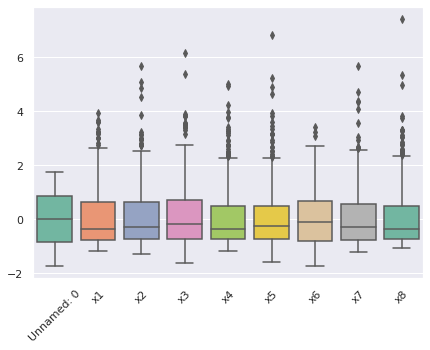

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

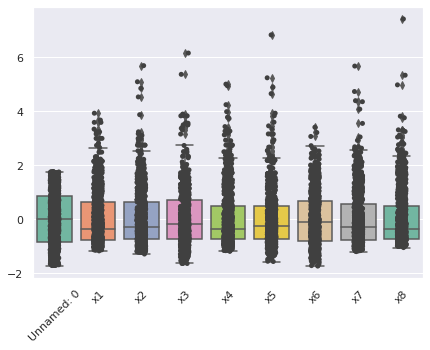

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Correlation Matrix

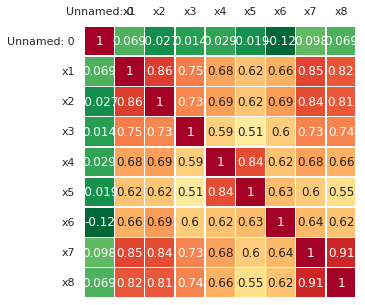

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

In [ ]:
# pca = PCA(n_components=2)
# Retain 95% of useful features and create new dimensions
pca = PCA(0.95)
Z = pca.fit_transform(X)

print("Shape of X:", X.shape)
print("Shape of Z:", Z.shape)

Shape of X: (1048, 9)
Shape of Z: (1048, 6)


In [ ]:
pca.n_components_

3

In [ ]:
print(Z)

Text(0, 0.5, '$Z_2$')

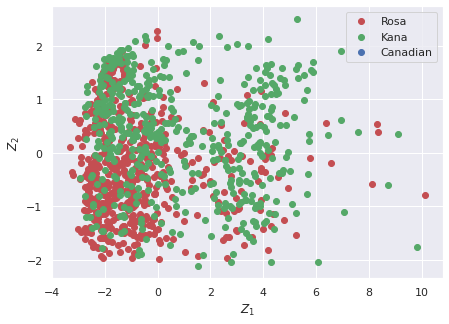

In [ ]:
# 1(Rosa)-> 0,  2(Kama)-> 1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa, 0], Z[idx_Rosa, 1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana, 0], Z[idx_Kana, 1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian, 0], Z[idx_Canadian, 1], c='b', label='Canadian')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

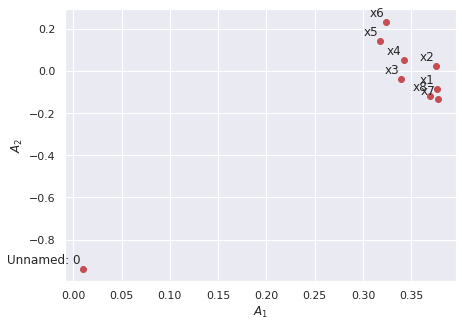

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


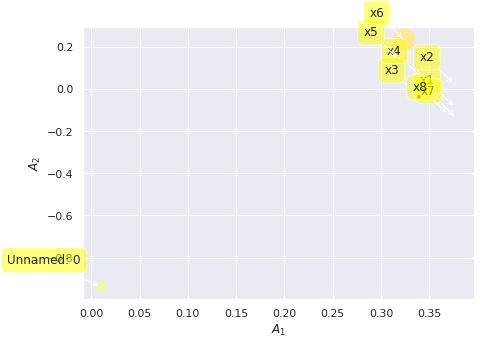

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

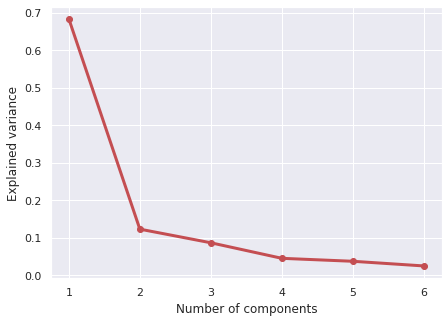

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

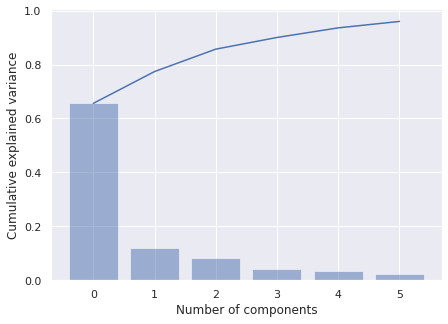

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

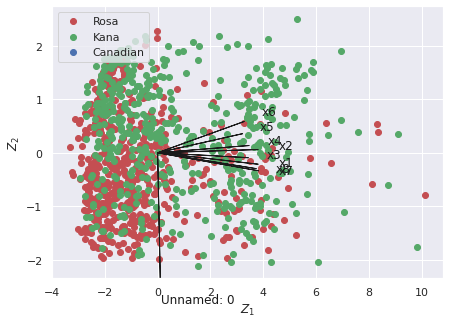

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=bb06c5318f28a84934a20d0df6932fb425962a7c1d93e966543b3322862ec39f
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=d4a74676436959db76a87399a976173b61fbb1a5f062e28bb62f17bc481849d7
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6
0    -1.585674  1.713257  0.123193 -0.531316 -0.017003  0.333865
1    -0.455743  2.101640 -0.096020  1.062273  0.016772  0.425520
2    -1.676523  1.769352  0.145288 -0.263729 -0.368098 -0.039145
3    -1.379786  1.682303 -0.660901  0.312894 -0.763235 -0.220907
4     0.958758  1.892706 -0.127225  0.347672 -0.388731  0.026858
...        ...       ...       ...       ...       ...       ...
1043  0.992462 -1.271083  0.869783  1.193418 -0.446093  0.140546
1044 -2.009130 -1.389475  1.261214  0.812137 -0.276367 -0.178085
1045 -0.881752 -1.728797 -0.251837  0.620448  0.189835  0.637805
1046 -1.828179 -1.882109 -0.011927 -0.045256  0.188432  0.081849
1047  6.083184 -2.046914  0.127998 -0.865775 -0.141236 -1.057322

[1048 rows x 6 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [1048] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [1048] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff0c3403340>)

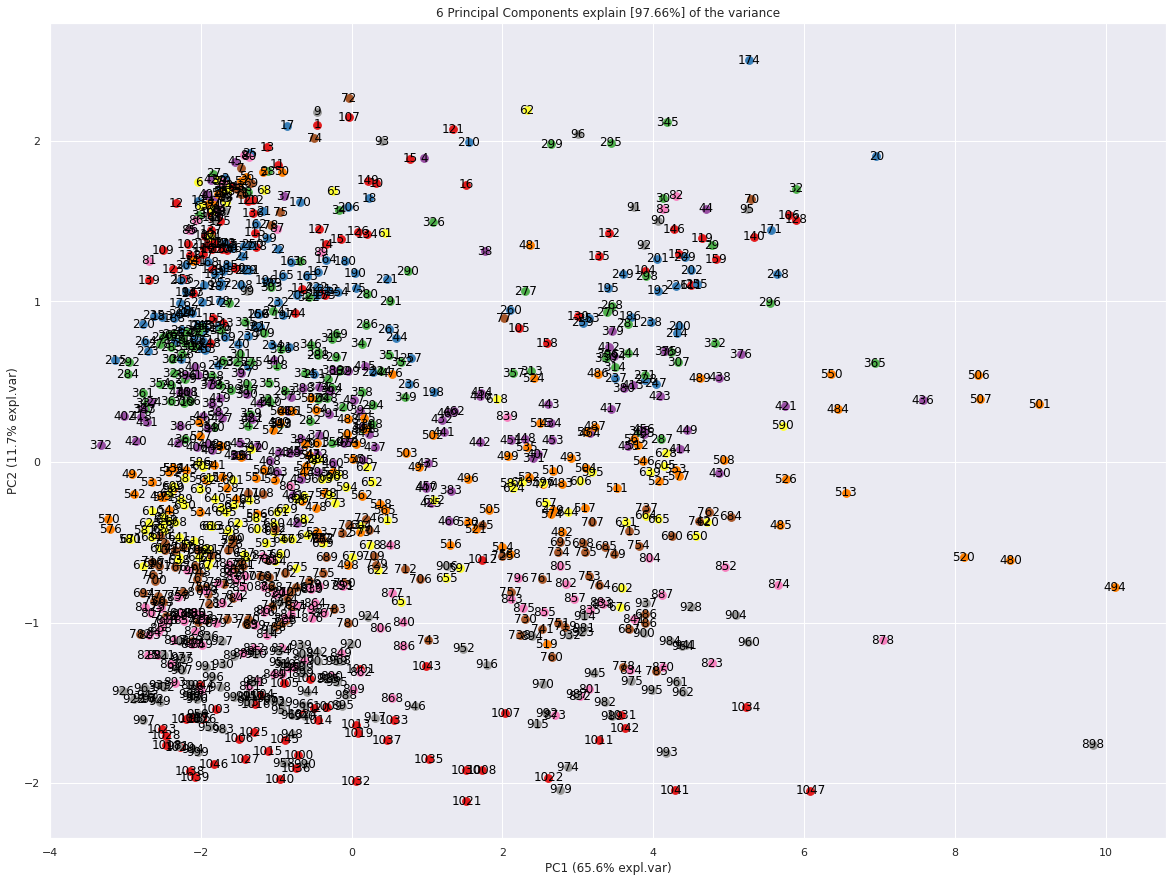

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

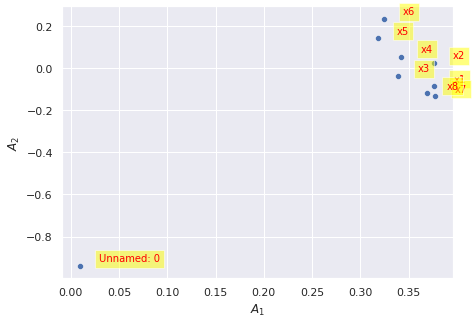

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

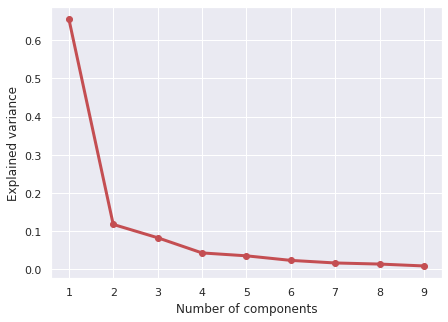

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

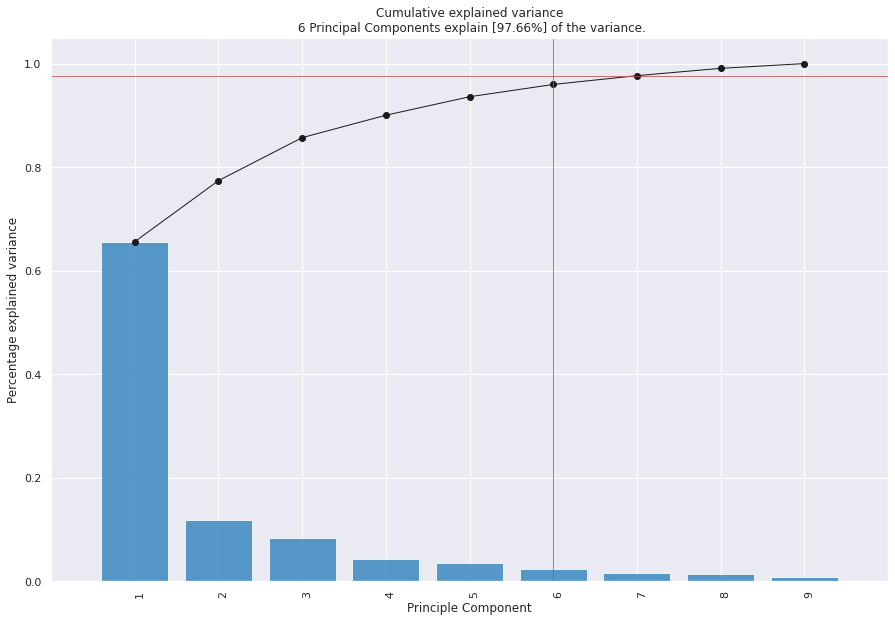

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [1048] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [1048] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


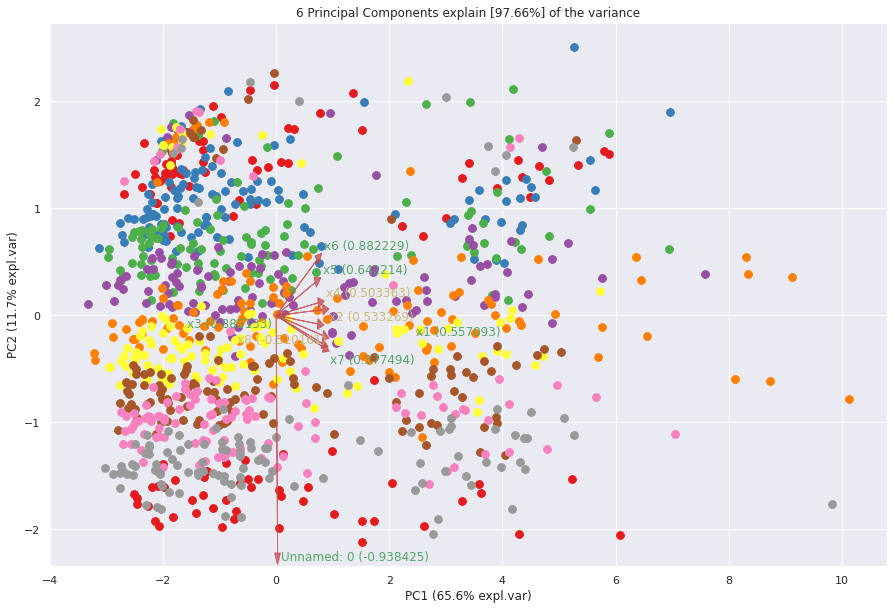

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff0cc1e25e0>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [1048] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [1048] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


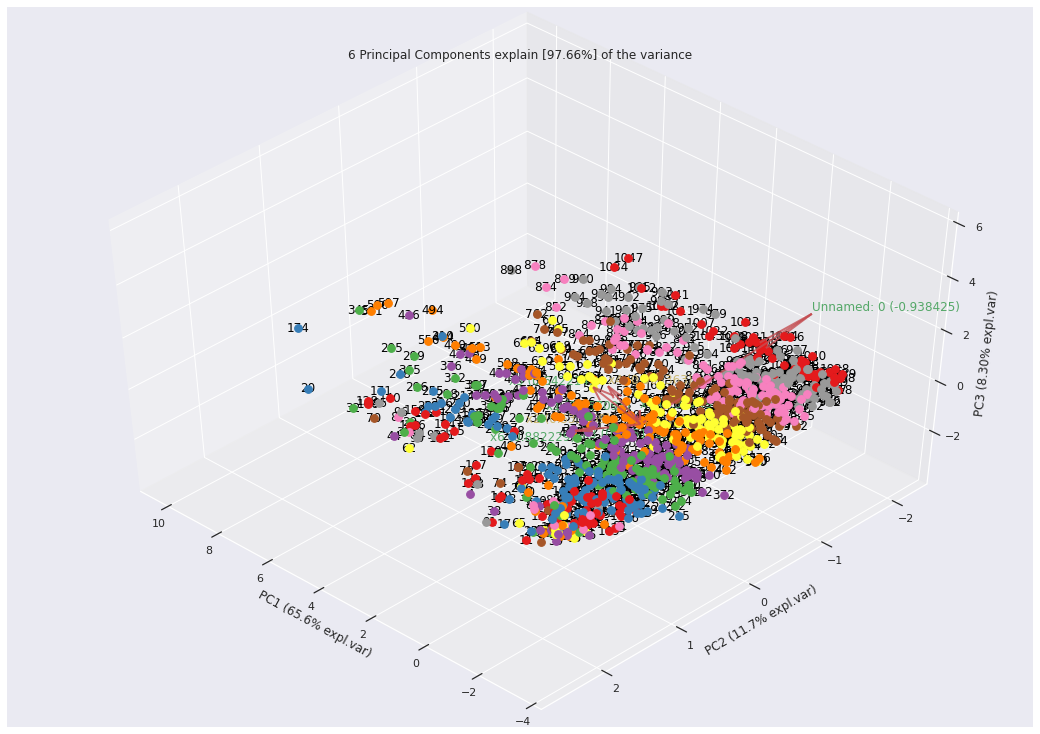

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7ff0c7fbfee0>)

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/vbolise/Project/main/cost-of-living.csv')
df.head(25)

Unnamed: 0     x1      x2     x3    x4     x5    x6    x7    x8  class
0            0   4.90   22.04   4.28  1.84   3.67  1.78  0.48  0.19      1
1            1   5.59   40.51   5.59  1.12   4.19  3.96  0.52  0.32      1
2            2   2.54   22.25   3.50  2.02   3.18  2.19  0.59  0.27      1
3            3   3.54   27.40   3.54  1.24   1.90  2.91  0.93  0.51      1
4            4   7.16   52.77   6.03  3.02   4.52  3.86  1.46  0.78      1
5            5   2.60   28.09   5.62  2.25   4.21  2.06  0.50  0.26      1
6            6   2.00   14.69   3.67  2.20   3.67  1.60  0.36  0.15      1
7            7   4.05   27.94   4.89  0.84   1.68  3.41  0.44  0.32      1
8            8   3.67   18.36   3.67  2.45   4.28  2.49  0.46  0.19      1
9            9   4.19   30.73   5.59  1.40   4.05  4.55  0.51  0.43      1
10          10   7.22   43.31   5.47  3.25   3.61  3.19  1.17  0.78      1
11          11   3.38   45.06   6.76  1.13   1.80  3.40  0.39  0.26      1
12          12   2.23   11.14   3.56  2.12   2.67  1.39  0.29  0.18      1
13          13   1.87   11.24   4.68  5.62   4.92  1.89  0.27  0.15      1
14          14   7.45   37.27   6.52  2.24   3.35  1.51  1.08  0.75      1
15          15   7.22   43.31   5.05  4.30   5.05  3.42  1.21  0.82      1
16          16  13.10   65.50   6.55  4.09   4.09  3.42  1.30  0.74      1
17          17   4.19   27.94   4.89  1.12   3.91  4.14  0.47  0.33      1
18          18   7.78   39.95   6.75  2.59   4.10  2.75  1.03  0.75      1
19          19   4.07   20.36   4.07  1.63   2.55  1.76  0.26  0.15      1
20          20  25.00  100.00  10.00  8.00  10.00  5.38  2.72  2.32      1
21          21   5.36   24.14   4.29  2.68   3.22  1.84  0.88  0.31      1
22          22   6.40   25.00   5.00  1.79   2.40  1.75  1.00  0.81      1
23          23   3.06   18.36   4.28  2.11   3.67  2.01  0.46  0.18      1
24          24   4.00   29.19   4.96  0.88   1.94  1.49  0.88  0.76      1

In [ ]:
df["class"].unique()
print(df.count())

Unnamed: 0    1048
x1            1048
x2            1048
x3            1048
x4            1048
x5            1048
x6            1048
x7            1048
x8            1048
class         1048
dtype: int64


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
print(data.count())
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Unnamed: 0    943
x1            943
x2            943
x3            943
x4            943
x5            943
x6            943
x7            943
x8            943
class         943
dtype: int64
Data for Modeling: (943, 10)
Unseen Data For Predictions: (105, 10)


In [ ]:
data_unseen

Unnamed: 0     x1     x2    x3    x4    x5    x6    x7    x8  class
0             3   3.54  27.40  3.54  1.24  1.90  2.91  0.93  0.51      1
1             5   2.60  28.09  5.62  2.25  4.21  2.06  0.50  0.26      1
2            17   4.19  27.94  4.89  1.12  3.91  4.14  0.47  0.33      1
3            47   2.02  20.03  5.21  0.81  1.62  1.89  0.43  0.27      1
4            49   3.14  18.86  6.15  0.56  1.68  2.51  0.42  0.28      0
..          ...    ...    ...   ...   ...   ...   ...   ...   ...    ...
100        1081   2.45  14.27  5.20  0.92  1.63  1.09  0.82  0.50      0
101        1091   7.22  27.07  5.05  3.61  3.61  2.17  0.94  0.69      0
102        1095   7.22  27.07  5.05  6.99  7.99  4.99  1.00  0.69      0
103        1097   5.22  37.27  6.52  1.49  4.01  1.94  1.13  0.56      1
104        1105  13.24  57.13  8.31  3.12  3.12  1.63  2.07  1.27      1

[105 rows x 10 columns]

In [ ]:
print(data_unseen.count())

Unnamed: 0    105
x1            105
x2            105
x3            105
x4            105
x5            105
x6            105
x7            105
x8            105
class         105
dtype: int64


In [ ]:
print(data.index)

RangeIndex(start=0, stop=943, step=1)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (943, 10)
5                           Missing Values             False
6                         Numeric Features                 9
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (660, 9)
12                    Transformed Test Set          (283, 9)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4672
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.7591  0.8124  0.7322  0.7527   
rf               Random Forest Classifier    0.7545  0.8146  0.7133  0.7568   
lightgbm  Light Gradient Boosting Machine    0.7545  0.8183  0.7356  0.7506   
gbc          Gradient Boosting Classifier    0.7470  0.8022  0.7228  0.7441   
lr                    Logistic Regression    0.7182  0.7911  0.6561  0.7263   
qda       Quadratic Discriminant Analysis    0.7167  0.7826  0.6848  0.7143   
ridge                    Ridge Classifier    0.7106  0.0000  0.6273  0.7264   
ada                  Ada Boost Classifier    0.7106  0.7746  0.6851  0.7017   
lda          Linear Discriminant Analysis    0.7091  0.7885  0.6273  0.7241   
knn                K Neighbors Classifier    0.6621  0.7297  0.6211  0.6536   
nb                            Naive Bayes    0.6591  0.7359  0.4520  0.7370   
dt               Decision Tree Classifier    0.6470  0.6467  0.6401  0.6296   
svm                   SVM - Linear Kernel    0.6364  0.0000  0.5554  0.7236   
dummy                    Dummy Classifier    0.5242  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
et        0.7379  0.5157  0.5205     0.165  
rf        0.7301  0.5061  0.5104     0.209  
lightgbm  0.7382  0.5074  0.5130     0.124  
gbc       0.7280  0.4919  0.4979     0.168  
lr        0.6861  0.4321  0.4370     0.374  
qda       0.6955  0.4308  0.4350     0.011  
ridge     0.6703  0.4156  0.4212     0.010  
ada       0.6889  0.4192  0.4232     0.086  
lda       0.6688  0.4126  0.4184     0.010  
knn       0.6317  0.3208  0.3247     0.015  
nb        0.5540  0.3042  0.3318     0.010  
dt        0.6309  0.2930  0.2959     0.013  
svm       0.5621  0.2701  0.3149     0.010  
dummy     0.0000  0.0000  0.0000     0.009

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6212  0.6186  0.5312  0.6296  0.5763  0.2382  0.2410
1       0.7121  0.7114  0.6875  0.7097  0.6984  0.4232  0.4234
2       0.6364  0.6379  0.6875  0.6111  0.6471  0.2747  0.2768
3       0.6364  0.6369  0.6562  0.6176  0.6364  0.2734  0.2739
4       0.6667  0.6673  0.6774  0.6364  0.6562  0.3333  0.3339
5       0.6364  0.6258  0.4516  0.6667  0.5385  0.2563  0.2696
6       0.6212  0.6226  0.6452  0.5882  0.6154  0.2438  0.2448
7       0.6667  0.6673  0.6774  0.6364  0.6562  0.3333  0.3339
8       0.6667  0.6673  0.6774  0.6364  0.6562  0.3333  0.3339
9       0.6061  0.6120  0.7097  0.5641  0.6286  0.2207  0.2273
Mean    0.6470  0.6467  0.6401  0.6296  0.6309  0.2930  0.2959
SD      0.0296  0.0294  0.0782  0.0380  0.0431  0.0588  0.0570

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6364  0.6595  0.4688  0.6818  0.5556  0.2653  0.2787
1       0.7576  0.7523  0.7188  0.7667  0.7419  0.5138  0.5148
2       0.7424  0.7615  0.6875  0.7586  0.7213  0.4829  0.4850
3       0.7424  0.7514  0.6875  0.7586  0.7213  0.4829  0.4850
4       0.7576  0.8023  0.7097  0.7586  0.7333  0.5116  0.5125
5       0.7121  0.8055  0.4839  0.8333  0.6122  0.4079  0.4462
6       0.6515  0.6922  0.6452  0.6250  0.6349  0.3017  0.3019
7       0.7576  0.8240  0.7419  0.7419  0.7419  0.5134  0.5134
8       0.7576  0.7364  0.6129  0.8261  0.7037  0.5061  0.5223
9       0.7121  0.8157  0.8710  0.6429  0.7397  0.4336  0.4590
Mean    0.7227  0.7601  0.6627  0.7394  0.6906  0.4419  0.4519
SD      0.0429  0.0514  0.1134  0.0663  0.0625  0.0864  0.0843

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5758  0.6824  0.3750  0.6000  0.4615  0.1413  0.1519
1       0.6515  0.7027  0.7500  0.6154  0.6761  0.3068  0.3139
2       0.6970  0.7960  0.7500  0.6667  0.7059  0.3956  0.3985
3       0.6515  0.7344  0.5938  0.6552  0.6230  0.3005  0.3017
4       0.6818  0.7742  0.6774  0.6562  0.6667  0.3625  0.3626
5       0.6515  0.7175  0.5484  0.6538  0.5965  0.2940  0.2975
6       0.6364  0.6613  0.5161  0.6400  0.5714  0.2619  0.2665
7       0.6364  0.7521  0.6129  0.6129  0.6129  0.2700  0.2700
8       0.7727  0.7336  0.6774  0.8077  0.7368  0.5395  0.5460
9       0.6667  0.7424  0.7097  0.6286  0.6667  0.3358  0.3382
Mean    0.6621  0.7297  0.6211  0.6536  0.6317  0.3208  0.3247
SD      0.0479  0.0385  0.1119  0.0554  0.0743  0.0975  0.0968

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6364  0.7362  0.4688  0.6818  0.5556  0.2653  0.2787
1       0.5758  0.6461  0.5312  0.5667  0.5484  0.1492  0.1494
2       0.6515  0.7491  0.6250  0.6452  0.6349  0.3017  0.3019
3       0.7424  0.8102  0.7500  0.7273  0.7385  0.4848  0.4851
4       0.6364  0.7387  0.5161  0.6400  0.5714  0.2619  0.2665
5       0.6515  0.7613  0.4839  0.6818  0.5660  0.2887  0.3005
6       0.6970  0.7069  0.5484  0.7391  0.6296  0.3826  0.3948
7       0.8030  0.8493  0.7419  0.8214  0.7797  0.6024  0.6050
8       0.7273  0.8263  0.5806  0.7826  0.6667  0.4443  0.4585
9       0.6515  0.7244  0.6452  0.6250  0.6349  0.3017  0.3019
Mean    0.6773  0.7549  0.5891  0.6911  0.6326  0.3483  0.3542
SD      0.0621  0.0573  0.0947  0.0733  0.0743  0.1247  0.1250

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7121  0.7877  0.5625  0.7826  0.6545  0.4189  0.4357
1       0.6515  0.7417  0.6562  0.6364  0.6462  0.3030  0.3032
2       0.7727  0.8373  0.7188  0.7931  0.7541  0.5438  0.5461
3       0.7121  0.8575  0.6562  0.7241  0.6885  0.4221  0.4239
4       0.7121  0.8000  0.5806  0.7500  0.6545  0.4146  0.4246
5       0.6818  0.7567  0.5484  0.7083  0.6182  0.3529  0.3614
6       0.6667  0.7005  0.5484  0.6800  0.6071  0.3234  0.3290
7       0.8636  0.9106  0.9032  0.8235  0.8615  0.7278  0.7308
8       0.6970  0.7594  0.6774  0.6774  0.6774  0.3917  0.3917
9       0.7121  0.7594  0.7097  0.6875  0.6984  0.4232  0.4234
Mean    0.7182  0.7911  0.6561  0.7263  0.6861  0.4321  0.4370
SD      0.0576  0.0590  0.1029  0.0567  0.0708  0.1170  0.1166

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7121  0.7803  0.6250  0.7407  0.6780  0.4211  0.4260
1       0.6667  0.7381  0.6875  0.6471  0.6667  0.3339  0.3346
2       0.7879  0.8382  0.7500  0.8000  0.7742  0.5746  0.5756
3       0.7424  0.8575  0.7188  0.7419  0.7302  0.4839  0.4841
4       0.7273  0.8000  0.6452  0.7407  0.6897  0.4485  0.4519
5       0.6818  0.7530  0.5484  0.7083  0.6182  0.3529  0.3614
6       0.6818  0.7014  0.6129  0.6786  0.6441  0.3577  0.3593
7       0.8030  0.9106  0.9032  0.7368  0.8116  0.6096  0.6236
8       0.7121  0.7567  0.7419  0.6765  0.7077  0.4253  0.4271
9       0.7273  0.7585  0.7419  0.6970  0.7188  0.4545  0.4554
Mean    0.7242  0.7894  0.6975  0.7168  0.7039  0.4462  0.4499
SD      0.0422  0.0597  0.0933  0.0419  0.0554  0.0865  0.0881

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6970  0.7362  0.5312  0.7727  0.6296  0.3878  0.4073
1       0.7727  0.8166  0.7812  0.7576  0.7692  0.5455  0.5457
2       0.7576  0.8465  0.8125  0.7222  0.7647  0.5165  0.5203
3       0.8030  0.8396  0.7500  0.8276  0.7869  0.6046  0.6071
4       0.8182  0.8733  0.8065  0.8065  0.8065  0.6350  0.6350
5       0.6667  0.7959  0.4839  0.7143  0.5769  0.3183  0.3348
6       0.7121  0.7295  0.6774  0.7000  0.6885  0.4211  0.4212
7       0.8182  0.8645  0.8065  0.8065  0.8065  0.6350  0.6350
8       0.7424  0.8226  0.7419  0.7188  0.7302  0.4839  0.4841
9       0.7576  0.8212  0.7419  0.7419  0.7419  0.5134  0.5134
Mean    0.7545  0.8146  0.7133  0.7568  0.7301  0.5061  0.5104
SD      0.0488  0.0463  0.1104  0.0425  0.0728  0.1008  0.0959

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6970  0.7601  0.5312  0.7727  0.6296  0.3878  0.4073
1       0.7424  0.8006  0.7812  0.7143  0.7463  0.4858  0.4878
2       0.7879  0.8594  0.8438  0.7500  0.7941  0.5769  0.5812
3       0.8485  0.8456  0.7812  0.8929  0.8333  0.6956  0.7008
4       0.7424  0.8332  0.7742  0.7059  0.7385  0.4858  0.4878
5       0.6667  0.7687  0.5161  0.6957  0.5926  0.3209  0.3311
6       0.7121  0.7244  0.6774  0.7000  0.6885  0.4211  0.4212
7       0.7879  0.8728  0.7742  0.7742  0.7742  0.5742  0.5742
8       0.7424  0.8166  0.7097  0.7333  0.7213  0.4820  0.4822
9       0.8182  0.8378  0.8710  0.7714  0.8182  0.6377  0.6424
Mean    0.7545  0.8119  0.7260  0.7510  0.7337  0.5068  0.5116
SD      0.0533  0.0454  0.1141  0.0556  0.0745  0.1095  0.1074

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7424  0.7923  0.5938  0.8261  0.6909  0.4801  0.4994
1       0.7273  0.7849  0.7812  0.6944  0.7353  0.4560  0.4594
2       0.8182  0.8631  0.8438  0.7941  0.8182  0.6367  0.6379
3       0.7727  0.8309  0.6562  0.8400  0.7368  0.5421  0.5549
4       0.7424  0.8240  0.7419  0.7188  0.7302  0.4839  0.4841
5       0.6212  0.7733  0.3871  0.6667  0.4898  0.2210  0.2417
6       0.6970  0.7171  0.6452  0.6897  0.6667  0.3895  0.3902
7       0.8333  0.8922  0.8387  0.8125  0.8254  0.6661  0.6664
8       0.7576  0.7963  0.7419  0.7419  0.7419  0.5134  0.5134
9       0.7879  0.8092  0.8065  0.7576  0.7812  0.5758  0.5768
Mean    0.7500  0.8083  0.7036  0.7542  0.7216  0.4964  0.5024
SD      0.0580  0.0461  0.1324  0.0586  0.0907  0.1210  0.1168

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (943, 10)
5                           Missing Values             False
6                         Numeric Features                 9
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (660, 3)
12                    Transformed Test Set          (283, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              2ec6
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.7076  0.7487  0.6810  0.6968   
gbc          Gradient Boosting Classifier    0.6985  0.7526  0.6490  0.7015   
rf               Random Forest Classifier    0.6955  0.7563  0.6652  0.6852   
et                 Extra Trees Classifier    0.6909  0.7614  0.6491  0.6876   
ada                  Ada Boost Classifier    0.6803  0.7393  0.6591  0.6696   
lightgbm  Light Gradient Boosting Machine    0.6788  0.7262  0.6591  0.6681   
ridge                    Ridge Classifier    0.6758  0.0000  0.6173  0.6748   
lda          Linear Discriminant Analysis    0.6758  0.7553  0.6173  0.6748   
lr                    Logistic Regression    0.6742  0.7569  0.6236  0.6701   
nb                            Naive Bayes    0.6682  0.7470  0.5406  0.6956   
qda       Quadratic Discriminant Analysis    0.6621  0.7406  0.5408  0.6843   
svm                   SVM - Linear Kernel    0.6364  0.0000  0.6209  0.6316   
dt               Decision Tree Classifier    0.6273  0.6261  0.6081  0.6087   
dummy                    Dummy Classifier    0.5242  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
knn       0.6863  0.4127  0.4152     0.022  
gbc       0.6679  0.3928  0.3985     0.085  
rf        0.6715  0.3881  0.3912     0.195  
et        0.6633  0.3785  0.3822     0.208  
ada       0.6597  0.3586  0.3624     0.078  
lightgbm  0.6578  0.3556  0.3607     0.043  
ridge     0.6410  0.3467  0.3500     0.009  
lda       0.6410  0.3467  0.3500     0.010  
lr        0.6419  0.3441  0.3473     0.022  
nb        0.6050  0.3272  0.3367     0.011  
qda       0.5998  0.3154  0.3241     0.009  
svm       0.6119  0.2715  0.2847     0.012  
dt        0.6065  0.2523  0.2536     0.012  
dummy     0.0000  0.0000  0.0000     0.009

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7424  0.7858  0.6250  0.8000  0.7018  0.4810  0.4924
1       0.7576  0.7702  0.8750  0.7000  0.7778  0.5182  0.5340
2       0.7879  0.8263  0.8438  0.7500  0.7941  0.5769  0.5812
3       0.6818  0.7960  0.6250  0.6897  0.6557  0.3613  0.3628
4       0.7424  0.8221  0.8387  0.6842  0.7536  0.4895  0.5007
5       0.6667  0.6793  0.4839  0.7143  0.5769  0.3183  0.3348
6       0.7121  0.7041  0.7419  0.6765  0.7077  0.4253  0.4271
7       0.8182  0.8765  0.8387  0.7879  0.8125  0.6364  0.6375
8       0.7273  0.7797  0.7097  0.7097  0.7097  0.4525  0.4525
9       0.6818  0.7382  0.7097  0.6471  0.6769  0.3648  0.3663
Mean    0.7318  0.7778  0.7291  0.7159  0.7167  0.4624  0.4689
SD      0.0460  0.0559  0.1188  0.0466  0.0674  0.0946  0.0941

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=29, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=29, p=2,
                     weights='distance')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=29, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7121  0.7321  0.5938  0.7600  0.6667  0.4200  0.4299
1       0.6970  0.7390  0.7812  0.6579  0.7143  0.3967  0.4034
2       0.8030  0.8185  0.7812  0.8065  0.7937  0.6053  0.6056
3       0.6667  0.7436  0.6250  0.6667  0.6452  0.3315  0.3321
4       0.6667  0.7502  0.6129  0.6552  0.6333  0.3284  0.3290
5       0.5909  0.6650  0.4194  0.5909  0.4906  0.1649  0.1717
6       0.6818  0.7392  0.6774  0.6562  0.6667  0.3625  0.3626
7       0.7879  0.8843  0.8065  0.7576  0.7812  0.5758  0.5768
8       0.6970  0.7350  0.6452  0.6897  0.6667  0.3895  0.3902
9       0.6515  0.7558  0.7097  0.6111  0.6567  0.3068  0.3104
Mean    0.6955  0.7563  0.6652  0.6852  0.6715  0.3881  0.3912
SD      0.0592  0.0552  0.1092  0.0654  0.0800  0.1214  0.1204

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6970  0.7886  0.5938  0.7308  0.6552  0.3900  0.3967
1       0.6970  0.7693  0.8125  0.6500  0.7222  0.3978  0.4099
2       0.8182  0.8566  0.7500  0.8571  0.8000  0.6347  0.6394
3       0.6818  0.7702  0.6875  0.6667  0.6769  0.3636  0.3638
4       0.6667  0.7419  0.6774  0.6364  0.6562  0.3333  0.3339
5       0.6364  0.7364  0.4194  0.6842  0.5200  0.2535  0.2733
6       0.7273  0.7627  0.7097  0.7097  0.7097  0.4525  0.4525
7       0.8182  0.8839  0.7742  0.8276  0.8000  0.6337  0.6349
8       0.6970  0.7908  0.6129  0.7037  0.6552  0.3872  0.3901
9       0.6970  0.7475  0.7742  0.6486  0.7059  0.3984  0.4050
Mean    0.7136  0.7848  0.6811  0.7115  0.6901  0.4245  0.4300
SD      0.0569  0.0464  0.1100  0.0716  0.0765  0.1157  0.1132

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


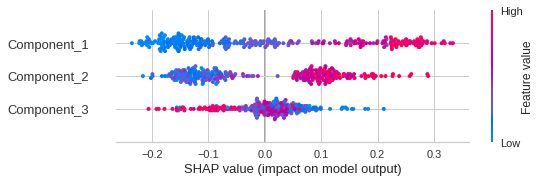

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
